In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import argparse
import EDKagomeLattice
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import KagomeDrawing as kdraw
from matplotlib.collections import LineCollection


In [3]:
L = 1 # Hi Patrick :) You don't want to change this

In [4]:
# Everything there should work fine *fingers crossed*
# Hamiltonian: H = J1 \sum_{<i,j>} s_i s_j + J2 \sum_{<<i,j>>} s_i s_j + J3 \sum_{<<i,j>>} s_i s_j
# --> J_i > 0 => antiferromagnetic, J_i < 0 => ferromagnetic
J1 = 1
J2 = 0.2
J3 = 0

In [5]:
def genArgs():
    parser = argparse.ArgumentParser()
    parser.add_argument('-f', type = str)
    parser.add_argument('--L', type = int, default = L, help = 'Lattice side size')
    # COUPLINGS
    parser.add_argument('--J1', type = float, default = J1,
                        help = 'NN coupling') # nearest-neighbour coupling
    parser.add_argument('--J2', type = float, default = J2,
                        help = '2nd NN coupling') # 2nd NN coupling
    parser.add_argument('--J3', type = float, default = J3,
                        help = '3rd NN coupling') # 3rd NN coupling
    parser.add_argument('--J4', type = float, default = 0.0,
                        help = '4th NN coupling')
    parser.add_argument('--h', type = float, default = 0.0,
                        help = 'Magnetic field')
    args = parser.parse_args()
    return args

In [6]:
def callED():
    args = genArgs()
    return EDKagomeLattice.main(args)

In [7]:
def unpackbits(x, num_bits):
    '''
    Thanks stackoverflow
    ...
    
    Unpacking the bits of an int with given number of bits
    '''

    xshape = list(x.shape)
    x = x.reshape([-1, 1])
    to_and = 2**np.arange(num_bits).reshape([1, num_bits])
    return (x & to_and).astype(bool).astype(int).reshape(xshape + [num_bits])

def getspinstate(index, L=1):
    '''
        Get the spinstate associated with the integer index,
        assuming a linear system size L.
        Returns:
        spinstate (np.array of +-1)
    '''
    spinstate = unpackbits(np.array(index),9*L**2)*2 - 1
    return spinstate

Lattice side size:  1


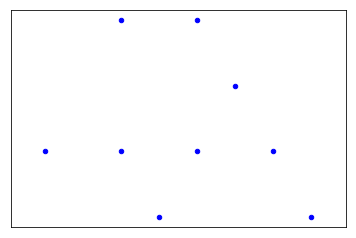

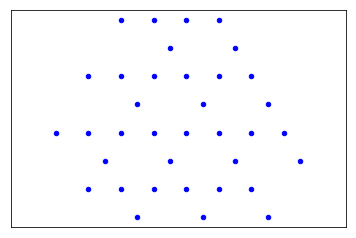

Couplings extracted:  {'J3': 0, 'J4': 0.0, 'J1': 1, 'J3st': 0, 'J2': 0.2}
hamiltonian computed


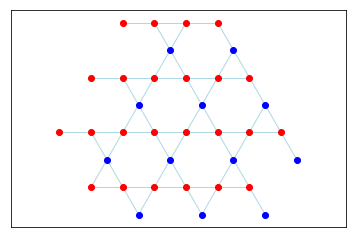

In [8]:
s_ijl, hamiltonian, minstate, minenergy, energies = callED()

In [9]:
minenergy/(9*L**2)

-0.8

In [ ]:
print("Comparison with Small J3 phase ground state energy:\n",
      minenergy/(9*L**2) -(-2/3 * J1 - 2/3 *J2 + J3))
print("Comparison with phase 2 GS energy:\n",
      minenergy/(9*L**2) -(-2/3 * J1 - 2/3*J2 + 3*J3))
print("Comparison with Intermediate phase ground state energy:\n",
      minenergy/(9*L**2) + 2/3 * J1 + 1/3 *J3)
print("Comparison with Small J2 phase ground state energy:\n",
      minenergy/(9*L**2) + 2/3 * J1 - 2/3 *J2 + J3)

In [ ]:
(-2/3 * J1 - 2/3*J2 + 3*J3)

In [ ]:
# There are 2^(9L^2) configurations.
# If you want to plot the nth one (with PBC repeated)
n = 10
print("--- Looking at configuration ", n, " ---")
print("E = ", energies[n])
spinstate = getspinstate(n)
print(spinstate)
plt.figure()
plt.axis('equal')
(s_ijl, ijl_s) = kdraw.createspinsitetable(L)
kdraw.plot_kag_spinstate(spinstate, ijl_s, L, 2, 'lightblue', 'blue', 'red', linewidth = 1)
plt.tick_params(  
    which = 'both',      # both major and minor ticks are affected
    bottom = False,      # ticks along the bottom edge are off
    top = False,         # ticks along the top edge are off
    labelbottom = False,
    left = False,
    right = False,
    labelleft = False)
plt.show()

print("Mapping to (i,j,l) coordinates")
for s,(i,j,l) in enumerate(s_ijl):
    print("(",i,",",j,",",l,"): s = ",spinstate[s])